# Scraping Solar Panel Details of varies solar companies across the world.

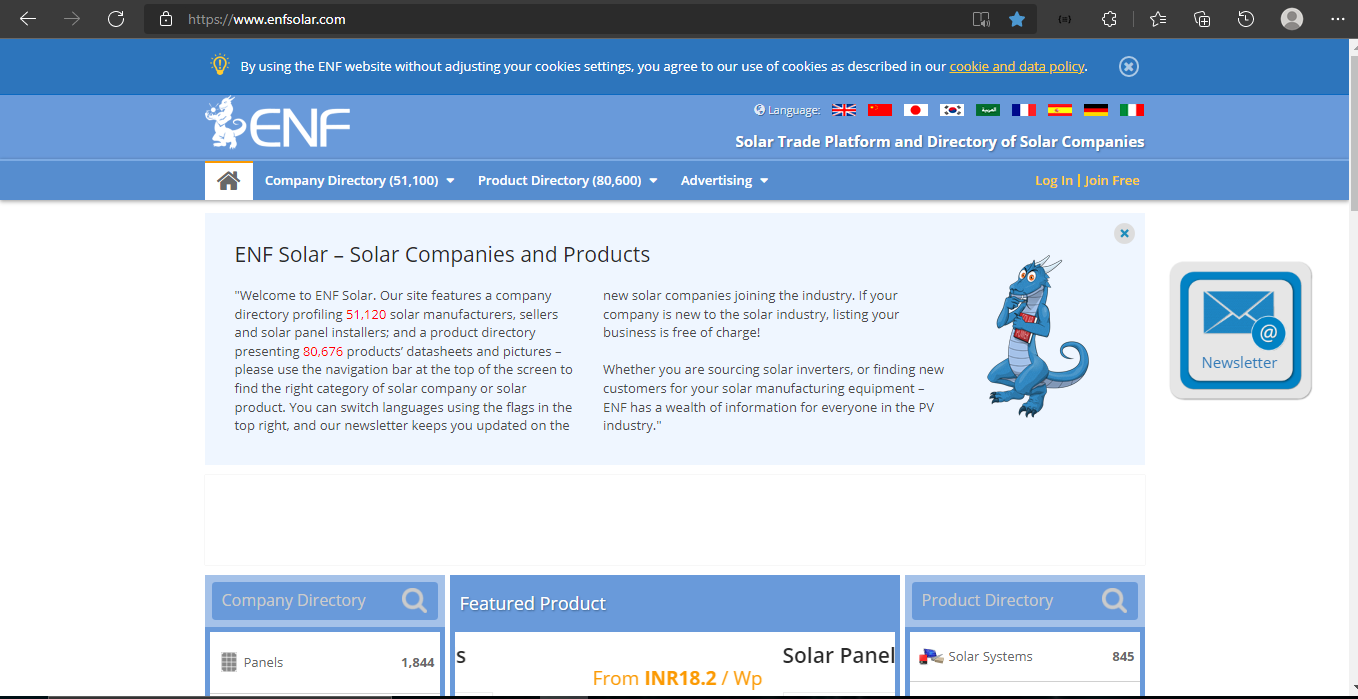

# Introduction 

### This project is about scraping solar panel details of the different companies from around the world. I have used a database from Europe for the project. The website name is https://www.enfsolar.com/ This website contains all the information about various products used in installing a mini solar power plant at house. I have attempted to collect only the information about solar panels listed in the site.

### I have decided to collect the following information about earch individual solar panel

1. Name of the product
2. Series Name
3. Price/Wp
4. Type
5. Power Range
6. Efficiency
7. Description of the product


## These are the steps that I have followed for the execution of this Project

1. Imorting the neccessary libraries
2. check wheather multiple pages can be accessed by the url definition or not
3. Use of simple while loop to get the required information
4. Using pandas create the dateframe
5. Check and convert the dataframe to csv file and at last
6. submit the project

# Step1: Importing the necessary libraries

### Here I have used Beautiful Soup Library to scrape the pages. The Beautiful Soup is a python library which is named after a Lewis Carroll poem of the same name in “Alice’s Adventures in the Wonderland”. Beautiful Soup is a python package and as the name suggests, parses the unwanted data and helps to organize and format the messy web data by fixing bad HTML and present to us in an easily-traversible XML structures. In short, Beautiful Soup is a python package which allows us to pull data out of HTML and XML documents.

### I have used requests to get the url response from the site https://www.enfsolar.com/ 

### Pandas is required to change the raw information in a clean data frame

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

# Step 2: check wheather multiple pages can be accessed by the url definition or not
Today I am trying to scrape a multiple pages, so I wanted to make sure all the pages can be accessed or not. In order to do that I just simply used a while with page numbers as a variable and printed out all the links

In [2]:
page = 1
while page != 10:
    url = f"https://www.enfsolar.com/pv/panel/{page}"
    print(url)
    page = page + 1

https://www.enfsolar.com/pv/panel/1
https://www.enfsolar.com/pv/panel/2
https://www.enfsolar.com/pv/panel/3
https://www.enfsolar.com/pv/panel/4
https://www.enfsolar.com/pv/panel/5
https://www.enfsolar.com/pv/panel/6
https://www.enfsolar.com/pv/panel/7
https://www.enfsolar.com/pv/panel/8
https://www.enfsolar.com/pv/panel/9


# Step3: Use of simple while loop to get the required information
Here First used while to get the information about a single value from 10 pages which is series name of the solar panel. To do this I declared a list, using find_all() function I  brought the information by its class name. While loop is used to change the page number. Each time the loop executes, The information from the li tag is stored inside the list series name 

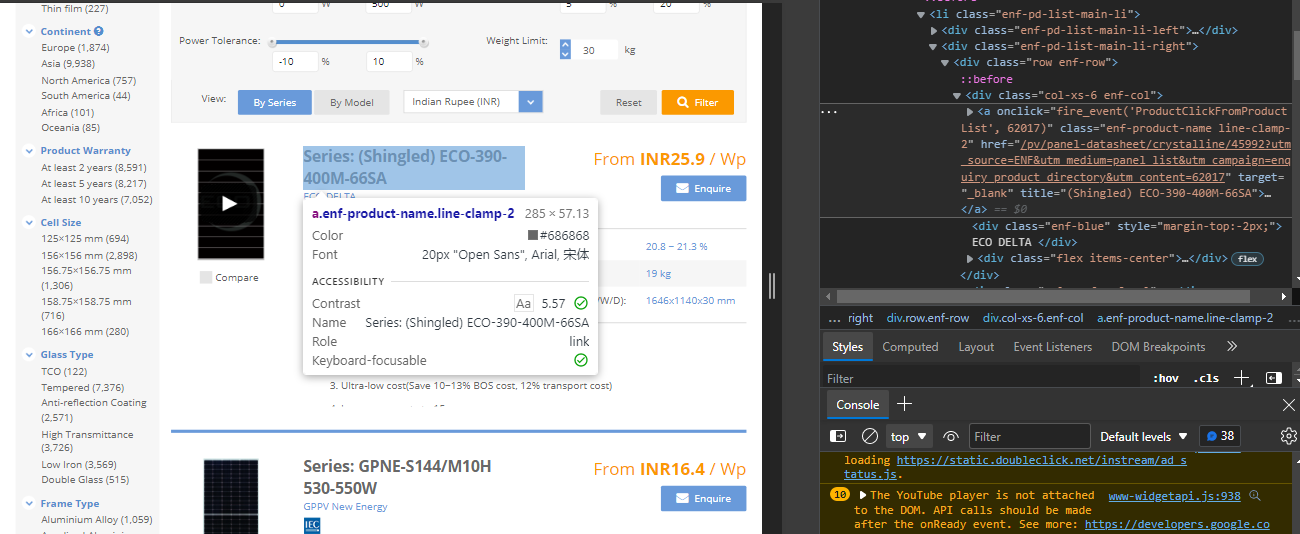




# gerneral_list() function


#### The general_list() function is a generalized function which can be used for get information from multiple pages of different tags with class names. 
#### The parameters include, total number of pages to be scraped or the last page number, A list which can carry the collected information, the tag name from which the data has to be collected, and lastly the class name for proper collection of similar tags.
#### In order to go from the starting page to the last page I have used a while loop with page to be as the itiration variable which is increamented at the end. 

#### The Function starts with url set to the specific address, then responses are brought from this site address using requests module with the help of get() function. The whole response is set parsed as lxml using beautifulSoup module. 

#### Using simple find_all method, information is brought from the specific tags by using their class names and appended into the list. This list can be later saved as a dataframe which is explained below

In [3]:
def general_list(list_item_name, tag_name,class_name):
    page = 1
    list_item_name = []
    while page != 50:
        url = f"https://www.enfsolar.com/pv/panel/{page}"
        response = requests.get(url)
        html = response.content
        soup = bs(html, "lxml")
        
        for i in soup.find_all(tag_name,{'class':class_name}):
            list_item_name.append(i.get_text(strip=True))
        page = page + 1
    return list_item_name


In [4]:
%%time
series_name=[]
Panel_series_name=[]
Panel_series_name=general_list(series_name,'a','enf-product-name line-clamp-2')

Wall time: 1min 49s


I repeated the procedure to get name of the solar company information from the site. Later on I appended all the lists to another List called panel_details.

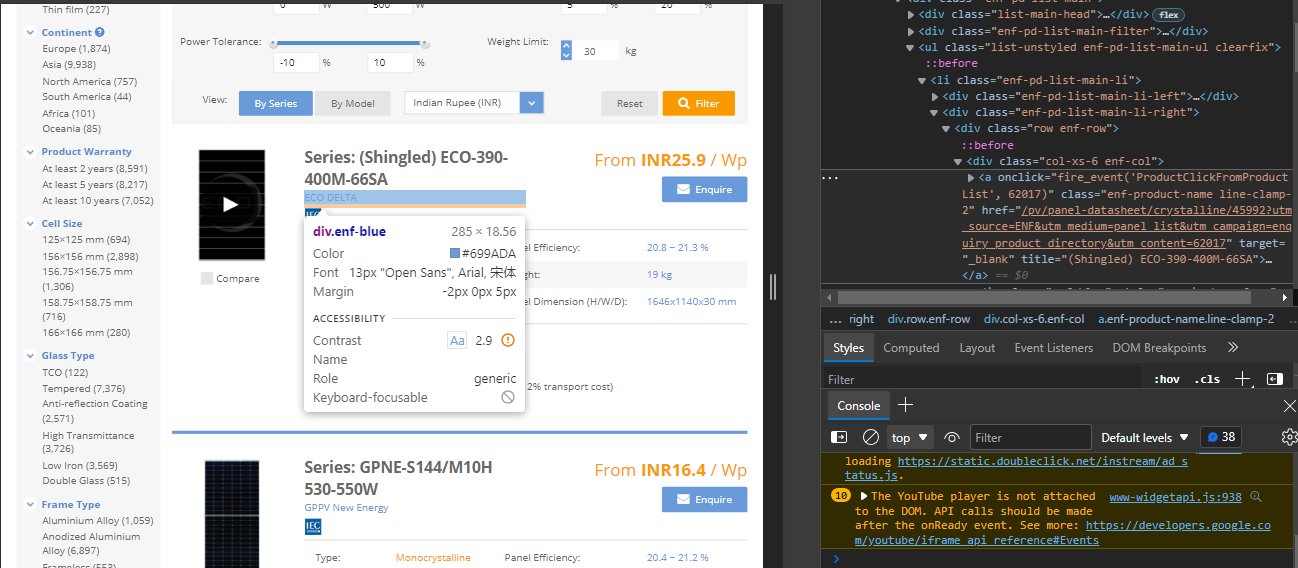

In [5]:
%%time
names=[]
Panel_names=[]
Panel_names=general_list(names,'div','enf-blue')

Wall time: 1min 47s


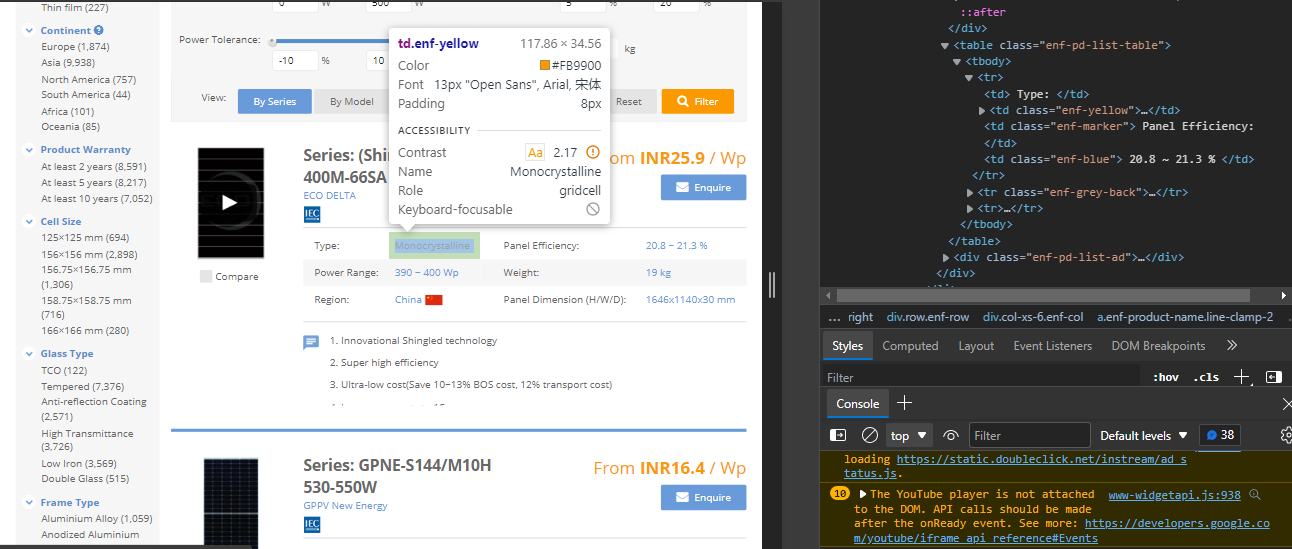

In [6]:
%%time
product_type=[]
Panel_type=[]
Panel_type=general_list(product_type,'td','enf-yellow')

Wall time: 1min 47s


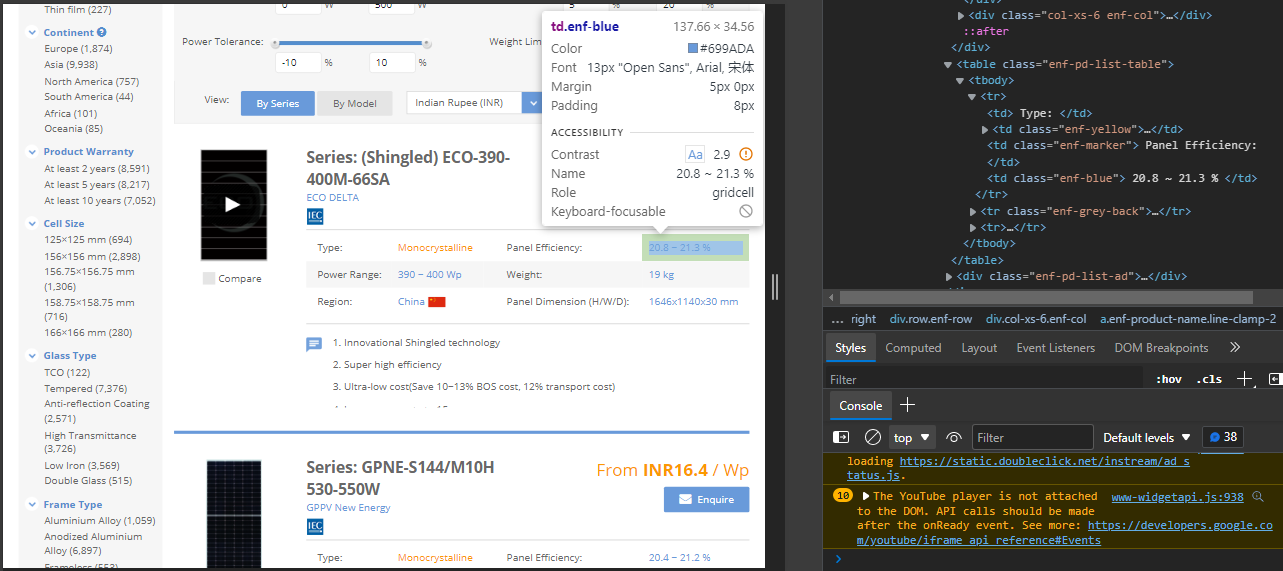

In [7]:
%%time
panel_efficiency = []
Efficiency=[]
Efficiency=general_list(panel_efficiency ,'td','enf-blue')

Wall time: 2min 39s


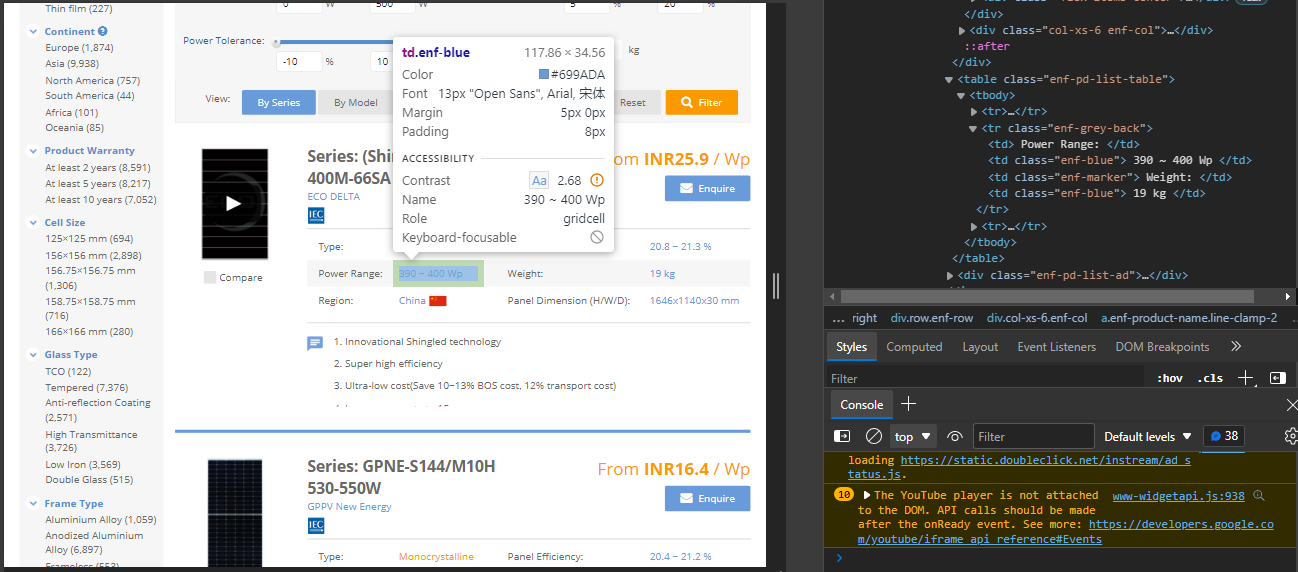

In [8]:
%%time
product_advantages = []
Product_Advantages=[]
Product_Advantages=general_list(product_advantages ,'div','enf-tooltip pull-right')

Wall time: 1min 43s


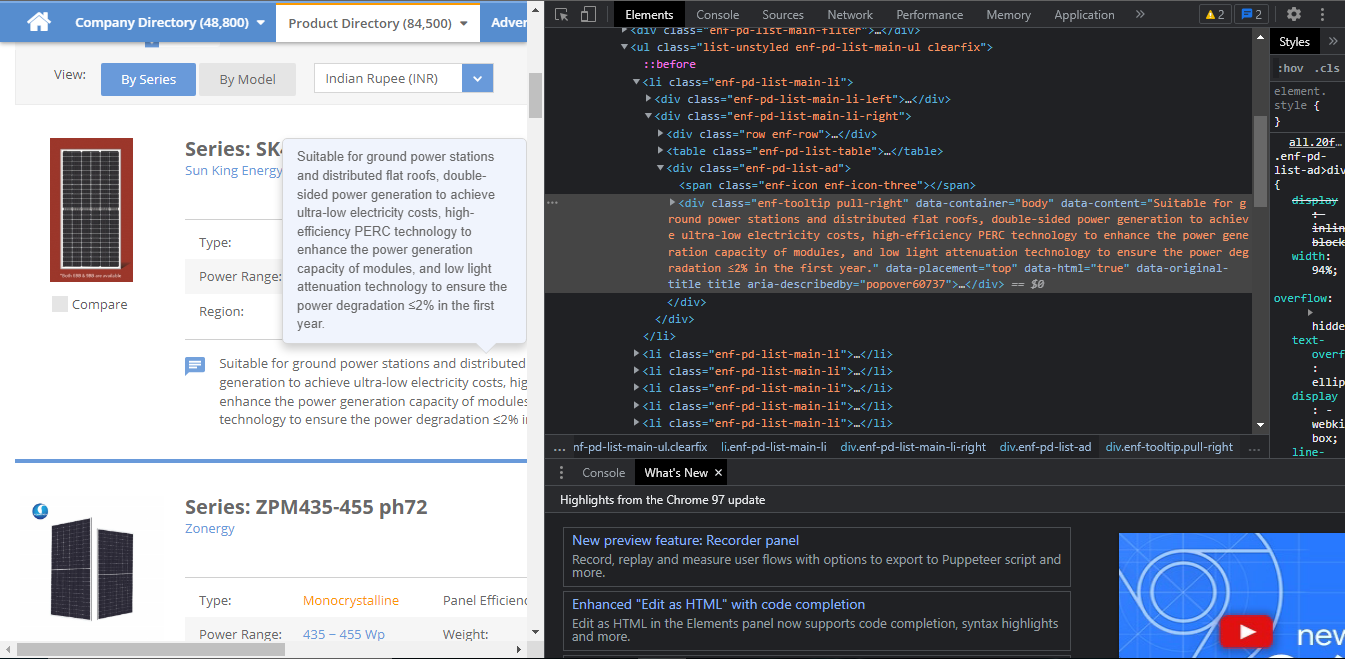

## Combining different lists into a single list

In [9]:
panel_details=[Panel_series_name,Panel_names,Panel_type,Efficiency ,Product_Advantages]

In [10]:
panel_details

[['Series:\n                                                RT200WM 200W-270W',
  'Series:\n                                                JFS2-144-18X 525-545W',
  'Series:\n                                                Mono PERC M6 Hieff Twin SP445-455-144M',
  'Series:\n                                                SPHM6-72L 430-455W',
  'Series:\n                                                166 HC Solar Module-120cell',
  'Series:\n                                                ESM 455H',
  'Series:\n                                                JAM72D30/MB-525-550W',
  'Series:\n                                                RS8I-M 535-560W',
  'Series:\n                                                MONO PERC 320W-345W 120HALF-CELLS (15...',
  'Series:\n                                                (9BB) 435-455BM-72Half cells solar panel',
  'Series:Trina SolarVertex TSM-DE20 585-605',
  'Series:\n                                                SL60M 270-285W',
  

# Step4: Using pandas create the dateframe

By using pd.DataFrame() method, I created a table by passing the list panel_detailsand cheked it by printing and using head()

In [11]:
df=pd.DataFrame(panel_details)
print(df.head())

                                                0     \
0  Series:\n                                     ...   
1                                      Runtech China   
2                                    Monocrystalline   
3                                      16.8 ~ 18.6 %   
4  - EVA encapsulated- Glass Foil Sandwich Lamina...   

                                                1     \
0  Series:\n                                     ...   
1                                JF Solar Technology   
2                                    Monocrystalline   
3                                       200 ~ 270 Wp   
4  1.\tLow PID Mono PERC with Half-cut Technology...   

                                                2     \
0  Series:\n                                     ...   
1                                       Sunpro Power   
2                                               PERC   
3                                            12.2 kg   
4  ● 12 years guarantee in product material● 2

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4890,4891,4892,4893,4894,4895,4896,4897,4898,4899
0,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,...,None,None,None,None,None,None,None,None,None,None
1,Runtech China,JF Solar Technology,Sunpro Power,SpolarPV,Jayu Solar,Einnova Solarline,Suzhou PV Solar Tech,Resun Solar,Horay Solar,East Lux Energy,...,None,None,None,None,None,None,None,None,None,None
2,Monocrystalline,Monocrystalline,PERC,PERC,Monocrystalline,Monocrystalline,Monocrystalline,Monocrystalline,Monocrystalline,Monocrystalline,...,None,None,None,None,None,None,None,None,None,None
3,16.8 ~ 18.6 %,200 ~ 270 Wp,12.2 kg,China,1500x670x35 mm,20.5 ~ 21.3 %,525 ~ 545 Wp,27.2 kg,China,2279x1134x35 mm,...,8.9 ~ 16.03 %,5 ~ 160 Wp,--,Spain,--,17.9 ~ 20.24 %,295 ~ 335 Wp,19 kg,China,--
4,- EVA encapsulated- Glass Foil Sandwich Lamina...,1.\tLow PID Mono PERC with Half-cut Technology...,● 12 years guarantee in product material● 25 y...,1. Higher module conversion efficiency (up to ...,"1. High-efficiency PERC cell, half-cut technol...","1. CE,TUV, IEC 61,215 & IEC 61,730, VDE, CEC c...",1.\tHigher Module Efficiency and Higher Output...,● 9 Busbars Solar Cells● Power Output Of Up to...,"● IEC 61,215, IEC 61,730● ISO 9,001: 2,015 Qua...",● Positive power tolerance of 0~3% improves sy...,...,None,None,None,None,None,None,None,None,None,None


In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,4890,4891,4892,4893,4894,4895,4896,4897,4898,4899
0,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,Series:\n ...,...,None,None,None,None,None,None,None,None,None,None
1,Runtech China,JF Solar Technology,Sunpro Power,SpolarPV,Jayu Solar,Einnova Solarline,Suzhou PV Solar Tech,Resun Solar,Horay Solar,East Lux Energy,...,None,None,None,None,None,None,None,None,None,None
2,Monocrystalline,Monocrystalline,PERC,PERC,Monocrystalline,Monocrystalline,Monocrystalline,Monocrystalline,Monocrystalline,Monocrystalline,...,None,None,None,None,None,None,None,None,None,None
3,16.8 ~ 18.6 %,200 ~ 270 Wp,12.2 kg,China,1500x670x35 mm,20.5 ~ 21.3 %,525 ~ 545 Wp,27.2 kg,China,2279x1134x35 mm,...,8.9 ~ 16.03 %,5 ~ 160 Wp,--,Spain,--,17.9 ~ 20.24 %,295 ~ 335 Wp,19 kg,China,--
4,- EVA encapsulated- Glass Foil Sandwich Lamina...,1.\tLow PID Mono PERC with Half-cut Technology...,● 12 years guarantee in product material● 25 y...,1. Higher module conversion efficiency (up to ...,"1. High-efficiency PERC cell, half-cut technol...","1. CE,TUV, IEC 61,215 & IEC 61,730, VDE, CEC c...",1.\tHigher Module Efficiency and Higher Output...,● 9 Busbars Solar Cells● Power Output Of Up to...,"● IEC 61,215, IEC 61,730● ISO 9,001: 2,015 Qua...",● Positive power tolerance of 0~3% improves sy...,...,None,None,None,None,None,None,None,None,None,None


In [14]:
df.shape

(5, 4900)

The DataFrame Contains 12380 rows and 5 columns

# Step 5: Check and convert the dataframe to csv file and at last
Since the data frame is clearly vissible in the above cell, Now Im converting the dataFrame to csv using to_csv() method

In [15]:
df.to_csv('New_Global_Solar_panel_data.csv')

# Step 6: submit the project

# Conclusion and Future work

Here I have used https://www.enfsolar.com/ to collect the information about different companies solar panel details. The site also contains various other products. In future I will try to scrape other product details listed in the site.  

In [16]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit( project='Scraping Solar Panel Details of varies solar companies accross the world',file='New_Global_Solar_panel_data.csv')

<IPython.core.display.Javascript object>

[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Updating notebook "reachto-smitha/scraping-solar-panel-details-of-varies-solar-companies-accross-the-world" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/reachto-smitha/scraping-solar-panel-details-of-varies-solar-companies-accross-the-world


'https://jovian.ai/reachto-smitha/scraping-solar-panel-details-of-varies-solar-companies-accross-the-world'